# 一.7特征数据聚类模型

1.GMM算法进行预测并画图展示聚类效果

https://blog.csdn.net/qq_40791906/article/details/105780361?spm=1001.2014.3001.5506

https://blog.csdn.net/sinat_26917383/article/details/70240628

KMeans算法画图展示聚类效果

当前聚类类别
[1 1 0 2 3 0 0 1 3 3 3 0 3 1 3 2 1 0 1 1 3 2 1 2 1 3 3 1 1 1 2 0 0 1 1 2 1
 1 1 1 2 0 0 0 2 1 3 0 1 0 1 3 3 2 1 1 2 1 3 3 2 1 3 0 1 1 2 3 0 2 3 2 2 3
 2 1 3 1 2 2 0 2 0 0 0 3 0 2 2 2 2 1 3 3 2 1 1 1 1 2 2 3 0 2 0 3 1 1 0 3 1
 0 3 0 0 1 1 3 0 2 1 0 3 2 1 2 3 3 0 2 1 3 2 0 1 1 1 1 0 1 3 1 2 1 1 1 2 3
 1 1 2 2 1 1 1 0 3 1 3 1 1 1 0 1 1 2 2 1 1 2 3 1 2 0 0 1 2 2 0 1 0 2 1 0 1
 2 3 3 0 2 2 2 2 1 0 1 1 2 2 1 0 2 1 1 2 1 2 0 2 1 0 3 2 1 2 2 1 2 2 2 2 2
 1 1 1 3 0 3 2 2 1 1 2 0 3 1 0 2 3 0 1 2 0 2 1 1 2 2 0 2 1 3 0 3 3 1 2 1 3
 1 3 1 1 2 2 1 3 2 1 3 2 3 3 0 2 2 0 1 0 1 1 0 1 3 1 1 1 2 3 0 1 2 1 1 1 2
 0 1 2 1 3 3 3 3 1 1 3 3 1 1 1 1 1 0 3 1 1 0 2 1 3 1 1 3 1 3 2 3 2 3 3 3 0
 1 1 2 3 2 1 1 3 2 1 1 3 1 3 3 3 2 1 3 2 0 2 1 2 2 2]
0类质心坐标为：12.406779661016943 24.7457627118644 28.57627118644068
1类质心坐标为：25.328244274809165 35.41984732824427 22.21374045801527
2类质心坐标为：17.180851063829785 35.0 28.87234042553192
3类质心坐标为：33.25333333333333 32.413333333333334 15.680000000000003


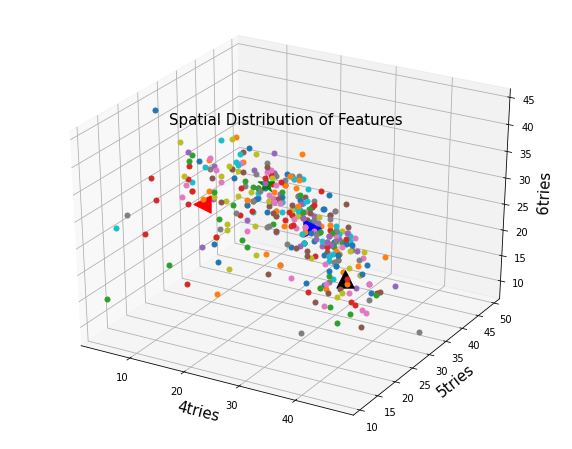

In [483]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import numpy as np

data = pd.read_excel('cpss_v2.xlsx')
# 取误差最小的3tries 4tries 5tries作为特征
feature = data[['3t','4t','5t']]
X = feature.values
EERIE = [[27,33,22,]]

k=4# 聚类类别个数
clf = KMeans(n_clusters=k) 
s = clf.fit(X) #加载数据集合

numSamples = len(X) 
label = clf.labels_
print('当前聚类类别') 
print(label) #显示类别

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

# 画出所有样例点 属于同一分类的绘制同样的颜色
mark = ['or', 'ob', 'og', 'ok']
for i in range(numSamples):
  #plt.plot(X[i][0], X[i][1], mark[label[i]],markersize = 4) # 画前两维
  ax.scatter3D(X[i][0], X[i][1], X[i][2], cmap=mark[label[i]],s=25)
  
# 画出质点，用特殊图型
color = ['r', 'b', 'g', 'k']
marker = ['<', '>', '*', '^']
center =  clf.cluster_centers_
heart=[]
for i in range(k):
  #plt.plot(center[i][0], center[i][1], mark[i], markersize = 16)# 画前两维
  ax.scatter3D(center[i][0], center[i][1], center[i][2], c = color[i], marker = marker[i],s=300)
  ax.set_xlabel("4tries", fontsize=15)
  ax.set_ylabel("5tries", fontsize=15)
  ax.set_zlabel('6tries', fontsize=15)
  ax.set_title('Spatial Distribution of Features', fontsize=15)
  # 质心坐标
  s=str(i)+'类质心坐标为：'+str(center[i, 0])+str(' ')+str( center[i, 1])+str(' ')+str( center[i, 2])
  print(s)
  heart.append([center[i, 0], center[i, 1],center[i, 2]])
plt.show()

# 二.聚类结果给定语义(欧氏距离)进行难度分类 由难到易

In [484]:
# 计算质心到原点的欧氏距离 距离越大 说明3tries 4tries 5tries中4tries或5tries占比越大 也就是该单词需要尝试多次才能解出 该单词越难
dist_ou={}
for i in range(k):
  dist=np.linalg.norm(np.array(heart[i])-np.array([0,0,0]))
  s=str(i)+'类质心到原点的欧氏距离为：'+str(dist)
  print(s)
  dist_ou[i]=dist
# 输出为类别-距离的字典
print('类别-距离：',dist_ou)
# 以字典中的距离为索引，由大到小排序 类别对应难易程度 比如类别排序为2 3 0 1则单词中2类最难 1类最简单
a = sorted(dist_ou.items(), key=lambda x: x[1], reverse=True)
print('按照距离由大到小排序：',a)

hardtosimple=['最难','较难','普通','容易']
duizhaobiao={}
for i in range(k):
  duizhaobiao[hardtosimple[i]]=a[i][0]
print('对照表',duizhaobiao)

0类质心到原点的欧氏距离为：39.78547761017734
1类质心到原点的欧氏距离为：48.882878474334966
2类质心到原点的欧氏距离为：48.5159116674654
3类质心到原点的欧氏距离为：49.012965178160314
类别-距离： {0: 39.78547761017734, 1: 48.882878474334966, 2: 48.5159116674654, 3: 49.012965178160314}
按照距离由大到小排序： [(3, 49.012965178160314), (1, 48.882878474334966), (2, 48.5159116674654), (0, 39.78547761017734)]
对照表 {'最难': 3, '较难': 1, '普通': 2, '容易': 0}


# 三.建立词性与每个单词ABCD属性对应的离散关系模型

In [485]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2023-02-19 09:41:43--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  45.0MB/s    in 0.2s    

2023-02-19 09:41:43 (45.0 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [486]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# https://blog.csdn.net/weixin_39934640/article/details/110844456
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk

In [487]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
df=df[df.columns[1:]]
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


In [488]:
word = ''.join(list(df['Word']))
for letter in range(26):
    letter=chr(letter+97)
    word=word.replace(letter, '')
word

'ï '

In [489]:
for i in df['Word']:
    if len(i)!=5:
        print(i)
# 最后一个单词应该是probe，应该是没有开始的r
# tash有,clen在有道词典中未找到该单词，所以我认为clen是clean，
# 也可以选择直接将改单词删掉

rprobe
clen
tash
favor 


In [490]:
# 在网上查找后，进行修改，网上可以找到每一天的答案
df['Word']=df['Word'].apply(lambda x:x.replace('ï', 'i'))
df['Word']=df['Word'].apply(lambda x:x.replace('rprobe', 'probe'))
df['Word']=df['Word'].apply(lambda x:x.replace('clen', 'clean'))
df['Word']=df['Word'].apply(lambda x:x.replace('tash', 'trash'))
df['Word']=df['Word'].apply(lambda x:x.replace('favor ', 'favor'))

In [491]:
word = ''.join(list(df['Word']))
for letter in range(26):
    letter=chr(letter+97)
    word=word.replace(letter, '')
word
# 再次检查是否有除了a-z之外的其他字符

''

In [492]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [493]:
# 注： 这里只是将第一版预处理的部分代码放到了这里而已  
# 统计单词中字母的个数  
df['word_len'] = df['Word'].apply(lambda x:len(set(x)))
# 对单词进行词性标注
df['tag'] = df['Word'].apply(lambda x:nltk.pos_tag(nltk.word_tokenize(x))[0][1])

# 这里开始是新的
# 词性进行one-hot编码
for tag in np.unique(df['tag']):
    df[tag]=df['tag']==tag
df=df[['Word','DT','JJ','JJR','MD','NN','NNS','PRP$','RB','VB','VBG','VBN']]
df

,Word,DT,JJ,JJR,MD,NN,NNS,PRP$,RB,VB,VBG,VBN
0,manly,False,False,False,False,False,False,False,True,False,False,False
1,molar,False,False,False,False,True,False,False,False,False,False,False
2,havoc,False,False,False,False,True,False,False,False,False,False,False
3,impel,False,False,False,False,True,False,False,False,False,False,False
4,condo,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
354,drink,False,False,False,False,True,False,False,False,False,False,False
355,query,False,False,False,False,True,False,False,False,False,False,False
356,gorge,False,False,False,False,True,False,False,False,False,False,False
357,crank,False,False,False,False,True,False,False,False,False,False,False


In [494]:
# 表逆序翻转
df['newindex'] = np.arange(len(df)-1,-1,-1)
df.sort_values('newindex',inplace=True)
df.drop('newindex',axis=1,inplace=True)
df

<ipython-input-494-f976e153bdd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newindex'] = np.arange(len(df)-1,-1,-1)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Word,DT,JJ,JJR,MD,NN,NNS,PRP$,RB,VB,VBG,VBN
358,slump,False,False,False,False,True,False,False,False,False,False,False
357,crank,False,False,False,False,True,False,False,False,False,False,False
356,gorge,False,False,False,False,True,False,False,False,False,False,False
355,query,False,False,False,False,True,False,False,False,False,False,False
354,drink,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4,condo,False,False,False,False,True,False,False,False,False,False,False
3,impel,False,False,False,False,True,False,False,False,False,False,False
2,havoc,False,False,False,False,True,False,False,False,False,False,False
1,molar,False,False,False,False,True,False,False,False,False,False,False


In [495]:
# 表内布尔值转化为int
for u in df.columns:
  if df[u].dtype==bool:
      df[u]=df[u].astype('int')
df

<ipython-input-495-4a104d0d013c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[u]=df[u].astype('int')


,Word,DT,JJ,JJR,MD,NN,NNS,PRP$,RB,VB,VBG,VBN
358,slump,0,0,0,0,1,0,0,0,0,0,0
357,crank,0,0,0,0,1,0,0,0,0,0,0
356,gorge,0,0,0,0,1,0,0,0,0,0,0
355,query,0,0,0,0,1,0,0,0,0,0,0
354,drink,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,condo,0,0,0,0,1,0,0,0,0,0,0
3,impel,0,0,0,0,1,0,0,0,0,0,0
2,havoc,0,0,0,0,1,0,0,0,0,0,0
1,molar,0,0,0,0,1,0,0,0,0,0,0


In [496]:
# 新增一列hskind 代表聚类类别 即难易程度 二者关系参考对照表 
df['hskind'] = label
df
# 这张表就是自变量与因变量

,Word,DT,JJ,JJR,MD,NN,NNS,PRP$,RB,VB,VBG,VBN,hskind
358,slump,0,0,0,0,1,0,0,0,0,0,0,1
357,crank,0,0,0,0,1,0,0,0,0,0,0,1
356,gorge,0,0,0,0,1,0,0,0,0,0,0,0
355,query,0,0,0,0,1,0,0,0,0,0,0,2
354,drink,0,0,0,0,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,condo,0,0,0,0,1,0,0,0,0,0,0,2
3,impel,0,0,0,0,1,0,0,0,0,0,0,1
2,havoc,0,0,0,0,1,0,0,0,0,0,0,2
1,molar,0,0,0,0,1,0,0,0,0,0,0,2


In [497]:
df=df[['DT','JJ','JJR','MD','NN','NNS','PRP$','RB','VB','VBG','VBN']]
X=df.values
X.shape

(359, 11)

In [498]:
Y=label
Y.shape

(359,)

In [499]:
# 创建DT-VBN对hskind的离散模型 选择随机森林
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)


(251, 11)
(108, 11)
(251,)
(108,)


In [500]:
#建立模型
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
dtc = dtc.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
#查看模型效果
score_d = dtc.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
#打印最后结果
print("Single Tree:",score_d)
print("Random Forest:",score_r)


Single Tree: 0.25
Random Forest: 0.25


# 四.**根据第二问对EERIE预测的结果百分比及聚类模型** 得到它属于哪一类 

In [501]:
EERIE = [[27,33,22,]]
# 根据第二问预测出的EERIE的3tries 4tries 5tries作为特征判断EERIE这个词的聚类类别
kind=clf.predict(EERIE)
print('EERIE聚类类别为：',kind)
# 对照表key与value翻转 便于查找
reverse_duizhaobiao = {v : k for k, v in duizhaobiao.items()}
print('翻转对照表',reverse_duizhaobiao)
print('EERIE难易程度为：',reverse_duizhaobiao[kind[0]])

EERIE聚类类别为： [1]
翻转对照表 {3: '最难', 1: '较难', 2: '普通', 0: '容易'}
EERIE难易程度为： 较难


# 五.根据EEIRIE词性及离散关系模型 推测其属于ABCD哪一类 与四进行对比

In [502]:
EERIE_shuxing = [[0,0,0,0,1,0,0,0,0,0,0]]# EERIE的词性one-hot编码
dtc_kind=dtc.predict(EERIE_shuxing)
print('决策树输出类别：',dtc_kind)
print('决策树输出EERIE难易程度为：',reverse_duizhaobiao[dtc_kind[0]])

rfc_kind=rfc.predict(EERIE_shuxing)
print('随机森林输出类别：',rfc_kind)
print('随机森林输出EERIE难易程度为：',reverse_duizhaobiao[rfc_kind[0]])

决策树输出类别： [1]
决策树输出EERIE难易程度为： 较难
随机森林输出类别： [1]
随机森林输出EERIE难易程度为： 较难
